# Formants

In [1]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [2]:
frequency, wave = wavfile.read("male_a_spa.wav")

In [3]:
frequency

16000

In [4]:
wave[:,0]

array([ 0,  0,  0, ..., 27, 21,  0], dtype=int16)

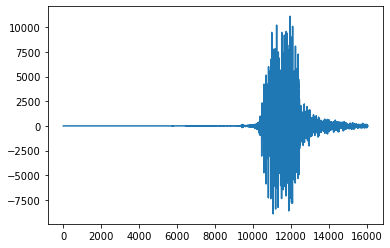

In [5]:
plt.plot(wave[:,0])

In [6]:
frequencies, time, spectrogram = signal.spectrogram(wave[:,0], frequency)
spectrogram.shape

(129, 71)

In [7]:
frequencies.shape

(129,)

In [8]:
time

array([0.008, 0.022, 0.036, 0.05 , 0.064, 0.078, 0.092, 0.106, 0.12 ,
       0.134, 0.148, 0.162, 0.176, 0.19 , 0.204, 0.218, 0.232, 0.246,
       0.26 , 0.274, 0.288, 0.302, 0.316, 0.33 , 0.344, 0.358, 0.372,
       0.386, 0.4  , 0.414, 0.428, 0.442, 0.456, 0.47 , 0.484, 0.498,
       0.512, 0.526, 0.54 , 0.554, 0.568, 0.582, 0.596, 0.61 , 0.624,
       0.638, 0.652, 0.666, 0.68 , 0.694, 0.708, 0.722, 0.736, 0.75 ,
       0.764, 0.778, 0.792, 0.806, 0.82 , 0.834, 0.848, 0.862, 0.876,
       0.89 , 0.904, 0.918, 0.932, 0.946, 0.96 , 0.974, 0.988])

In [9]:
spectrogram

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.74202353e-01, 8.29268098e-02, 5.47075689e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.24529076e+00, 6.70796156e+00, 1.15944366e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.70883989e+00, 7.28440732e-02, 1.12373095e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.26663426e-05, 1.03895676e-04, 3.31582050e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.10231727e-05, 1.22152351e-05, 3.88240551e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.39698092e-08, 1.00242542e-05, 5.16494401e-06]], dtype=float32)

In [10]:
cmap=get_cmap("coolwarm")

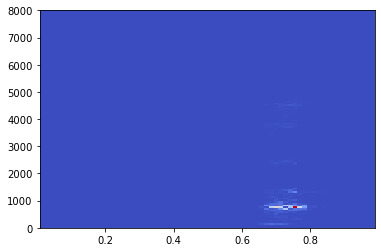

In [12]:
plt.pcolormesh(time, frequencies, spectrogram,cmap=cmap)

/home/ma0/miniconda3/envs/master_thesis/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         8.16782882e-01, 1.71757100e+00, 4.53797911e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.10487706e+00, 9.00337533e+00, 1.68779701e+01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.44126474e+00, 7.17750468e+00, 3.29069787e+01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.25157577e-04, 1.37558919e-05, 5.43321367e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.14538487e-05, 2.04944738e-05, 3.24072018e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.28265108e-06, 3.92083873e-05, 9.37992221e-07]]),
 array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
         500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
        1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
        1500. , 1562.5, 1625. , 1687.5, 1750. , 1

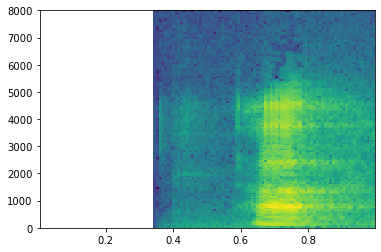

In [13]:
plt.specgram(wave[:,0], Fs=frequency)

In [14]:
wave.shape

(16043, 2)

Text(0, 0.5, 'Frequency')

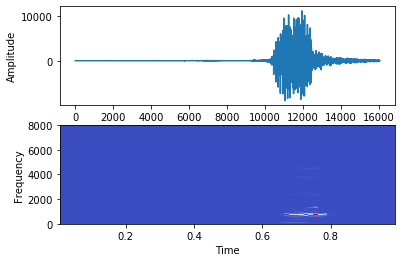

In [16]:
plt.subplot(211)

plt.plot(wave[:,0])

plt.xlabel('Sample')

plt.ylabel('Amplitude')

 

# Plot the spectrogram

plt.subplot(212)

plt.pcolormesh(time, frequencies, spectrogram, cmap=cmap)

plt.xlabel('Time')

plt.ylabel('Frequency')